# Visualizing Brain Coupling Maps

This example shows how to create publication-ready brain
visualizations of gastric-brain coupling results using
GastroPy's nilearn-based plotting functions.

We generate a synthetic PLV volume in MNI space to demonstrate
the available visualization options.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import gastropy as gp
from gastropy.neuro.fmri import to_nifti

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

## Create a Synthetic PLV Volume

We create a fake PLV volume in MNI space using the nilearn
template for realistic brain geometry.

In [2]:
from nilearn import datasets

# Load MNI template for reference geometry
mni = datasets.load_mni152_brain_mask(resolution=2)
mask_data = mni.get_fdata().astype(bool)
affine = mni.affine
vol_shape = mask_data.shape

# Create synthetic PLV: higher values in frontal/insular regions
rng = np.random.default_rng(42)
plv_flat = 0.02 + 0.01 * rng.standard_normal(mask_data.sum())
plv_flat = np.clip(plv_flat, 0, 1)

# Add a hotspot near the insula (MNI ~[-40, 10, 0])
coords = np.argwhere(mask_data)
center_vox = np.array([35, 65, 45])  # approximate insula
dists = np.linalg.norm(coords - center_vox, axis=1)
plv_flat[dists < 8] += 0.04

plv_3d = np.zeros(vol_shape)
plv_3d[mask_data] = plv_flat
print(f"Volume shape: {plv_3d.shape}")
print(f"Brain voxels: {mask_data.sum():,}")
print(f"PLV range: [{plv_flat.min():.4f}, {plv_flat.max():.4f}]")

Volume shape: (99, 117, 95)
Brain voxels: 235,375
PLV range: [0.0000, 0.0972]


## Anatomical Overlay (``plot_coupling_map``)

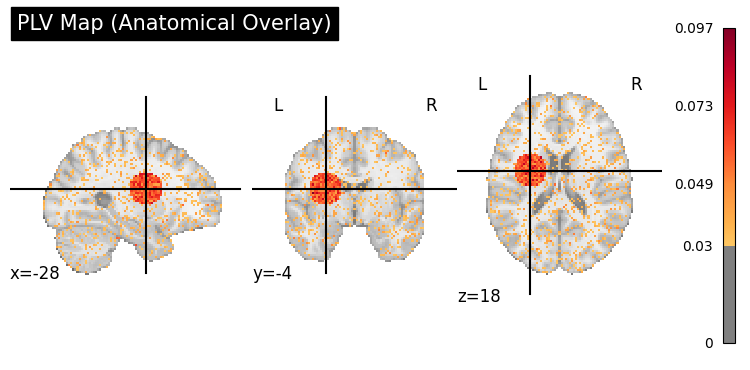

In [3]:
plv_img = to_nifti(plv_3d, affine)

display = gp.plot_coupling_map(plv_img, threshold=0.03, title="PLV Map (Anatomical Overlay)")
plt.show()

## Glass Brain (``plot_glass_brain``)

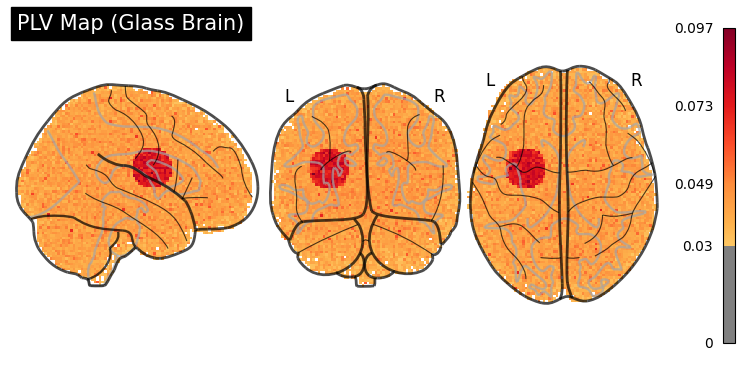

In [4]:
display = gp.plot_glass_brain(plv_img, threshold=0.03, title="PLV Map (Glass Brain)")
plt.show()

## Customization

Both functions accept nilearn keyword arguments and return
display objects for further customization.

C:\Users\Micah\AppData\Local\Temp\ipykernel_55452\1618551161.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


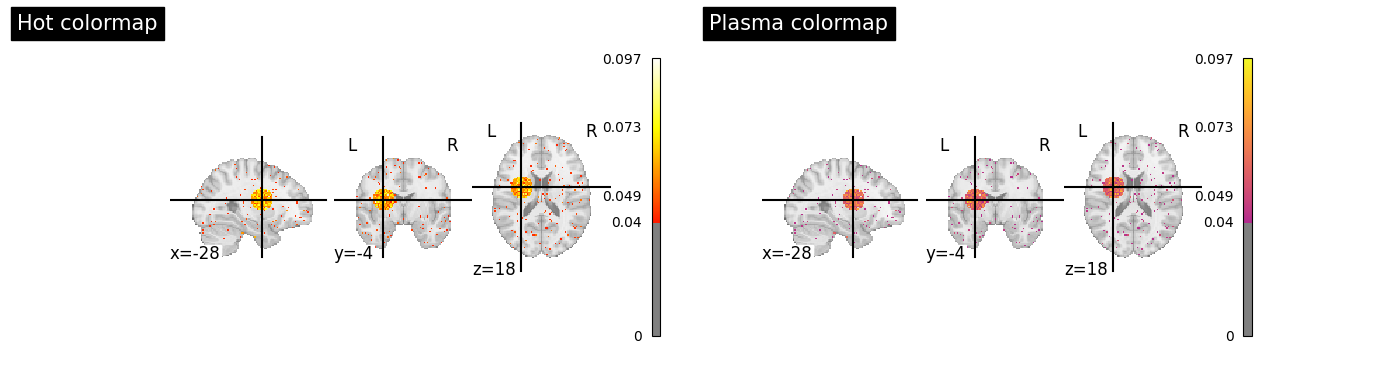

In [5]:
# Different colormaps and thresholds
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

gp.plot_coupling_map(
    plv_img,
    threshold=0.04,
    cmap="hot",
    title="Hot colormap",
    ax=axes[0],
)
gp.plot_coupling_map(
    plv_img,
    threshold=0.04,
    cmap="plasma",
    title="Plasma colormap",
    ax=axes[1],
)
plt.tight_layout()
plt.show()